In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(r"D:\Data\ObesityDataSet_raw_and_data_sinthetic.csv")

# Explore Data

In [3]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
df.replace({'Public_Transportation':'PublicTransportation'},inplace=True)

In [5]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                 MTRANS           NObeyesdad  
0  PublicTransportation        Normal_Weight  
1  PublicTransportation        Normal_Weight  
2  PublicTransportation        Normal_Weight  
3               Walking   Overweight_Level_I  
4  PublicTransportation  Overweight_Level_II

In [6]:
df.rename(columns={'family_history_with_overweight':'Family'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   Family      2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [8]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [9]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
numerical_cols = df.select_dtypes(include='float64').columns.tolist()

# Lets First undersand every feature in this data

| Column       |  Description  |
|--------------| --------------|
| family_history_with_overweight| Has a family member suffered or suffers from overweight?|
|FAVC| Do you eat high caloric food frequently?|
| FCVC | Do you usually eat vegetables in your meals?|
| NCP | How many main meals do you have daily?|
| CAEC | Do you eat any food between meals?|
| SMOKE | Do you smoke?|
| CH2O | How much water do you drink daily?|
| SCC | Do you monitor the calories you eat daily?|
| FAF | How often do you have physical activity?|
| TUE | How much time do you use technological devices such as cell phone, videogames, television, computer and others?|
|CALC | How often do you drink alcohol?|
| MTRANS | Which transportation do you usually use?|

In [11]:
numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

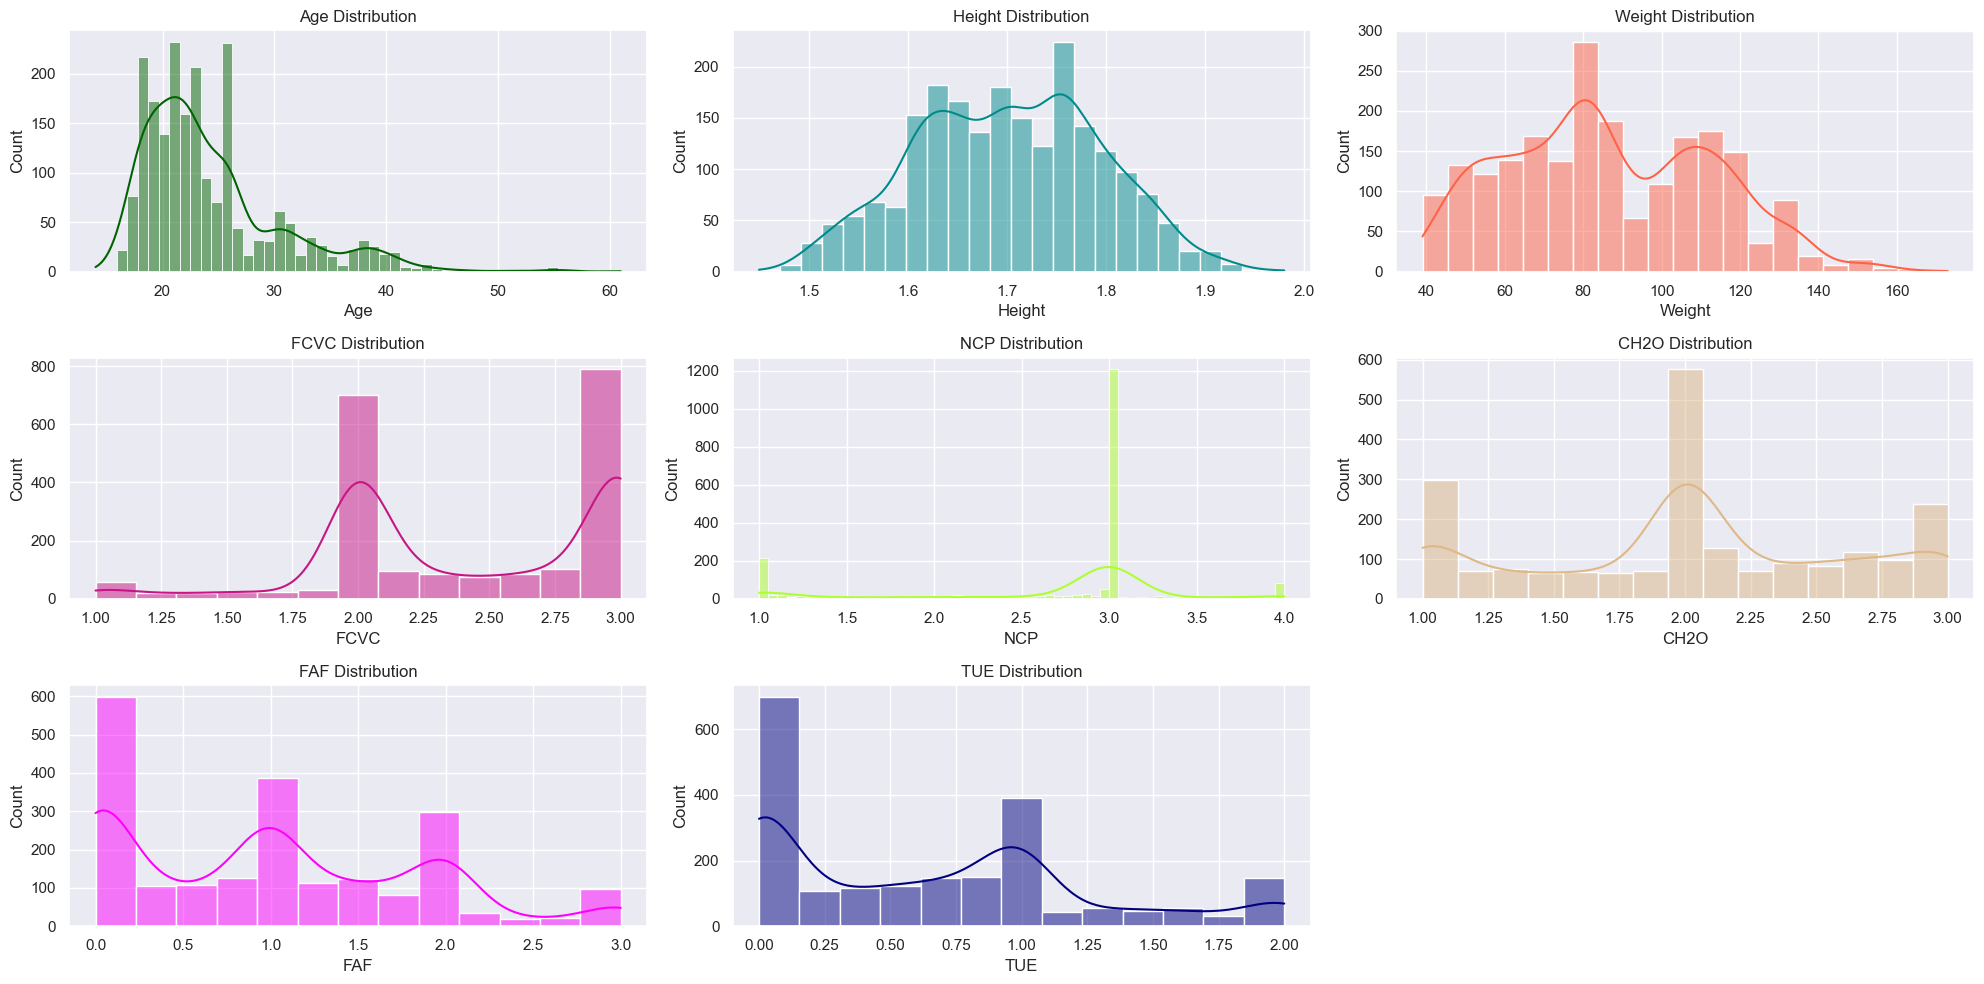

In [12]:
plt.figure(figsize=(20,10))
colors=['darkgreen','darkcyan','tomato','mediumvioletred','greenyellow','burlywood','fuchsia','navy']
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df,x=col,kde=True,color=colors[i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()
    

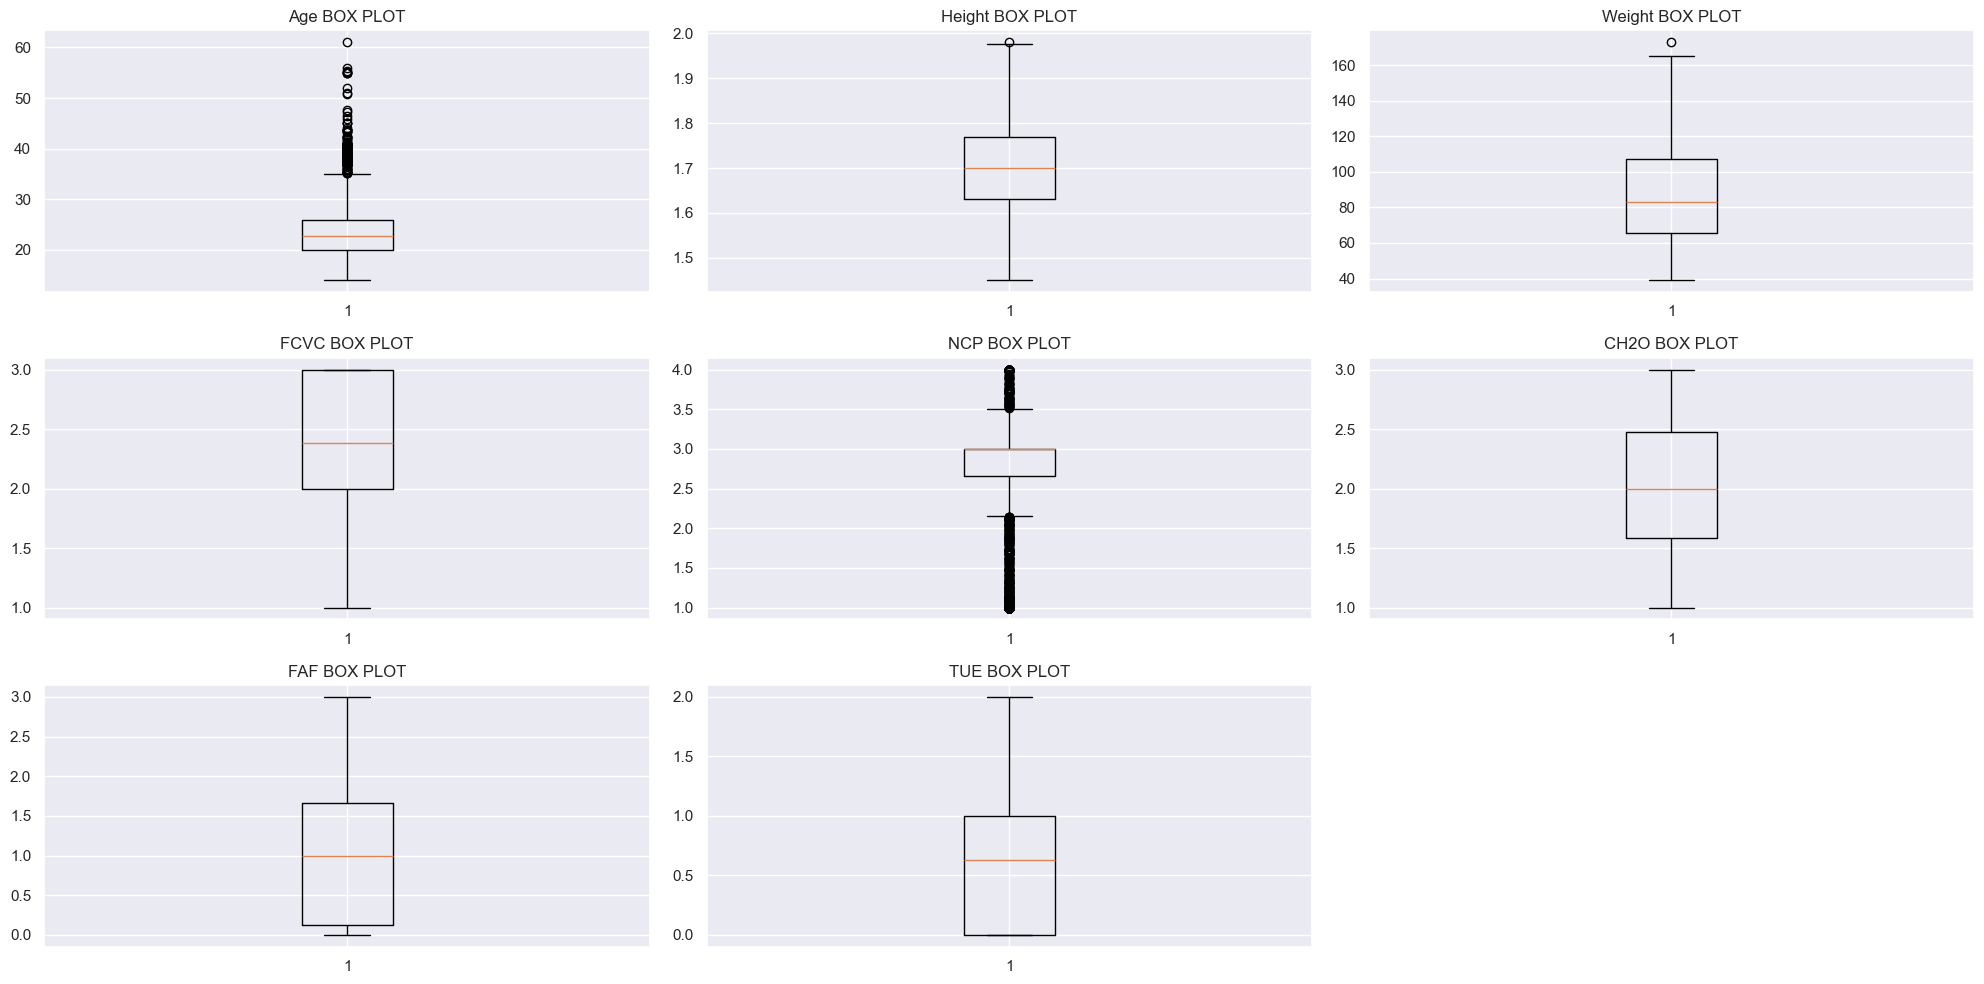

In [13]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    plt.boxplot(x=df[col])
    plt.title(f'{col} BOX PLOT')

plt.tight_layout()
plt.show()

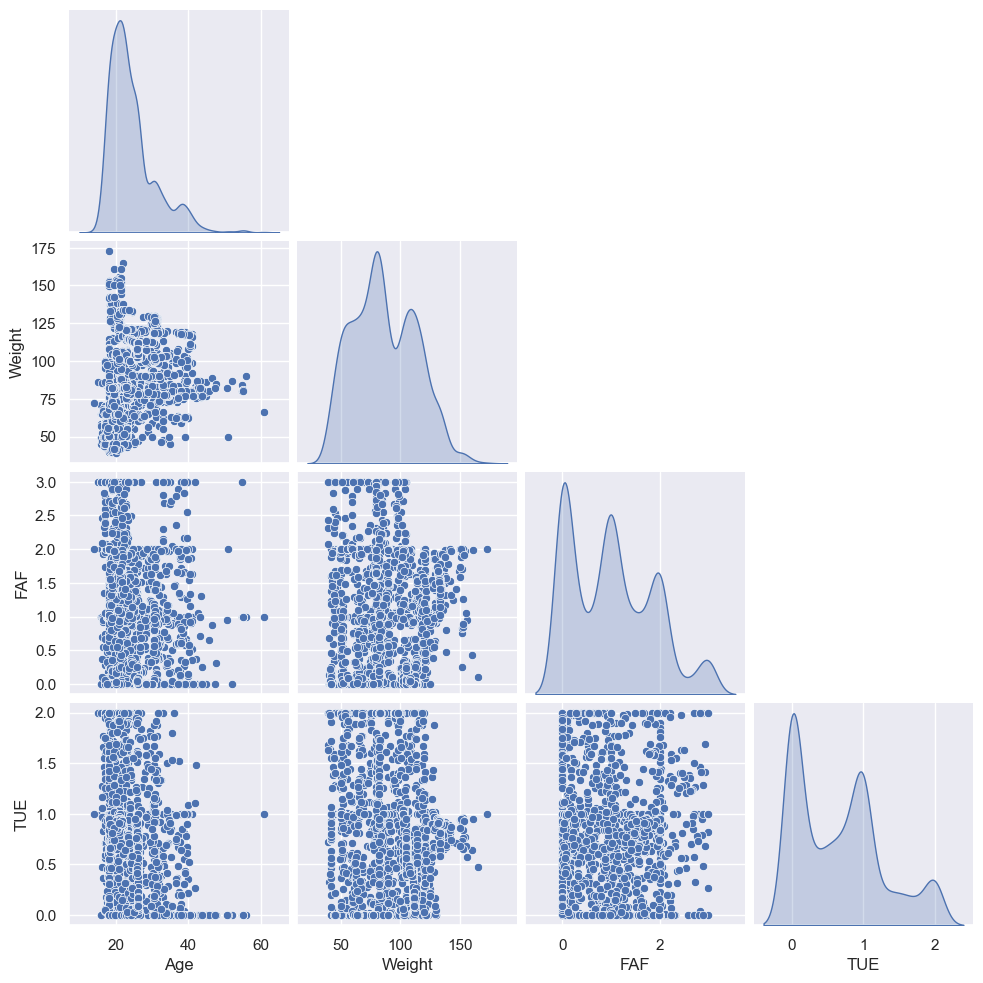

In [14]:
pairplot_cols = ['Age', 'Weight', 'FAF', 'TUE']
sns.pairplot(
    data=df, 
    vars=pairplot_cols, 
    diag_kind='kde', 
    corner = True,
)
plt.show()

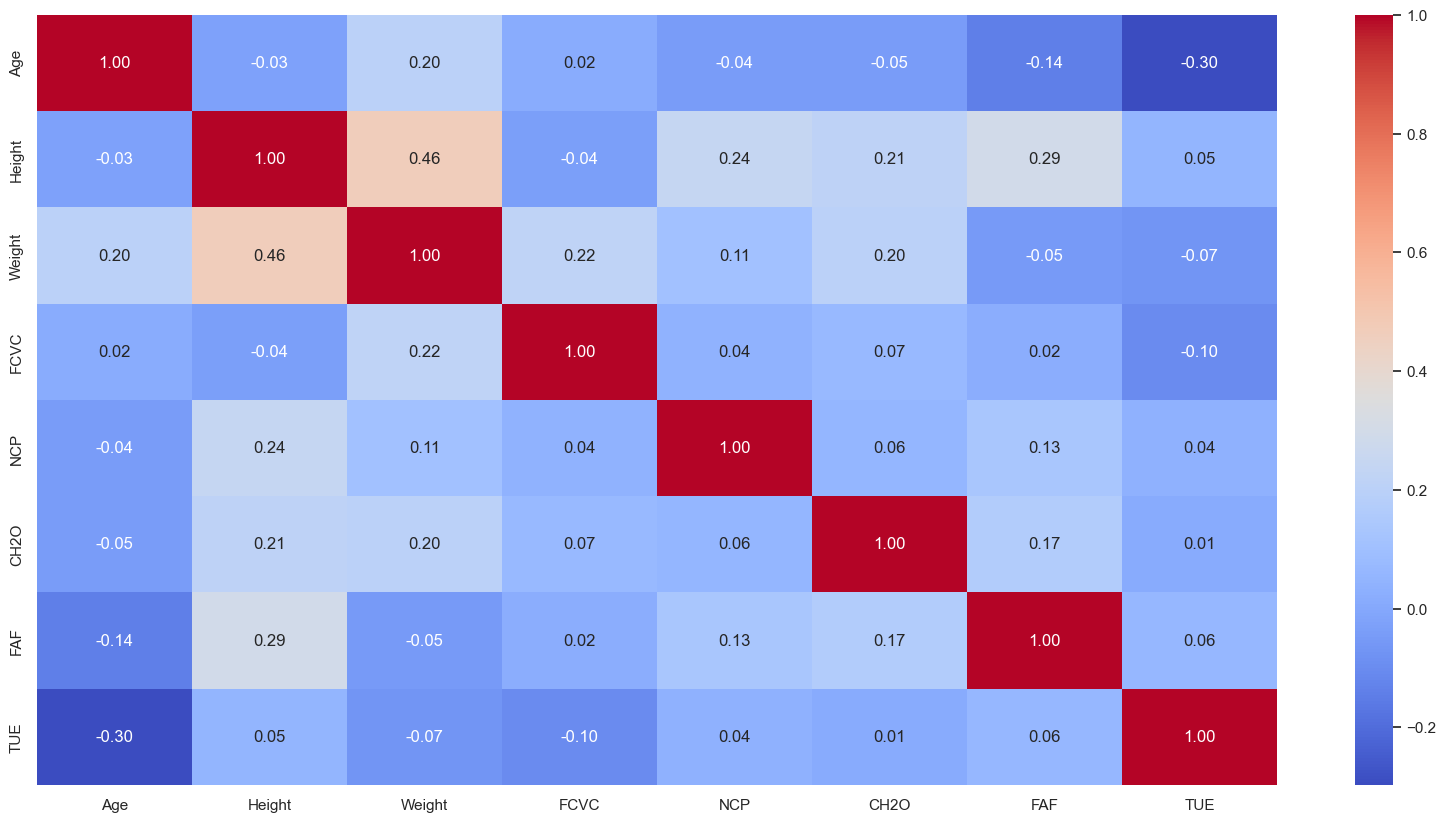

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [16]:
df.head()

Gender   Age  Height  Weight Family FAVC  FCVC  NCP       CAEC SMOKE  CH2O  \
0  Female  21.0    1.62    64.0    yes   no   2.0  3.0  Sometimes    no   2.0   
1  Female  21.0    1.52    56.0    yes   no   3.0  3.0  Sometimes   yes   3.0   
2    Male  23.0    1.80    77.0    yes   no   2.0  3.0  Sometimes    no   2.0   
3    Male  27.0    1.80    87.0     no   no   3.0  3.0  Sometimes    no   2.0   
4    Male  22.0    1.78    89.8     no   no   2.0  1.0  Sometimes    no   2.0   

   SCC  FAF  TUE        CALC                MTRANS           NObeyesdad  
0   no  0.0  1.0          no  PublicTransportation        Normal_Weight  
1  yes  3.0  0.0   Sometimes  PublicTransportation        Normal_Weight  
2   no  2.0  1.0  Frequently  PublicTransportation        Normal_Weight  
3   no  2.0  0.0  Frequently               Walking   Overweight_Level_I  
4   no  0.0  0.0   Sometimes  PublicTransportation  Overweight_Level_II

In [17]:
Y_Ncols = ['Gender','Family','FAVC','SMOKE','SCC']

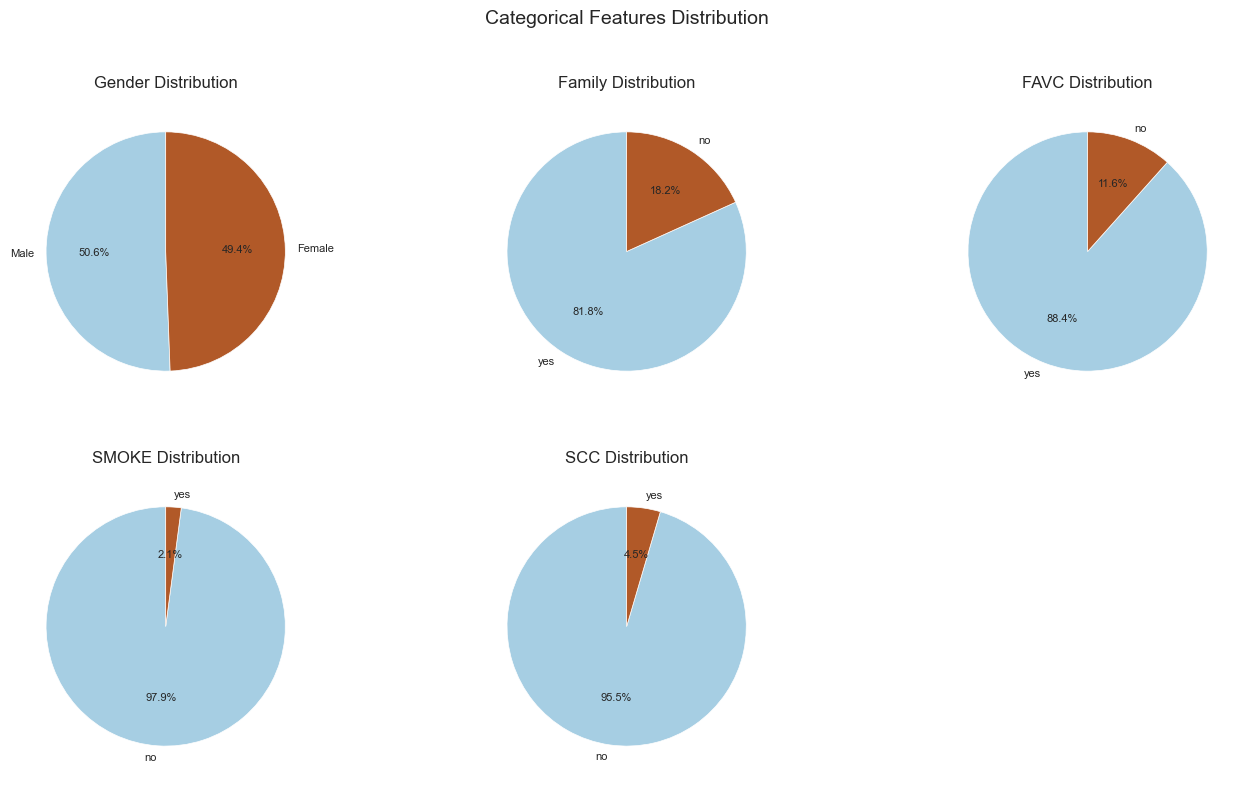

In [18]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(Y_Ncols): 
    plt.subplot(2, 3, i+1)
    counts = df[col].value_counts()
    labels = counts.index
    
    colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))  
    
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=labels,
        colors=colors,
        autopct='%.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  
        textprops={'fontsize': 8}  
    )
    
    
    plt.title(f'{col} Distribution', pad=10)
    plt.tight_layout(pad=3.0)  

plt.suptitle('Categorical Features Distribution', y=1.02, fontsize=14)
plt.show()

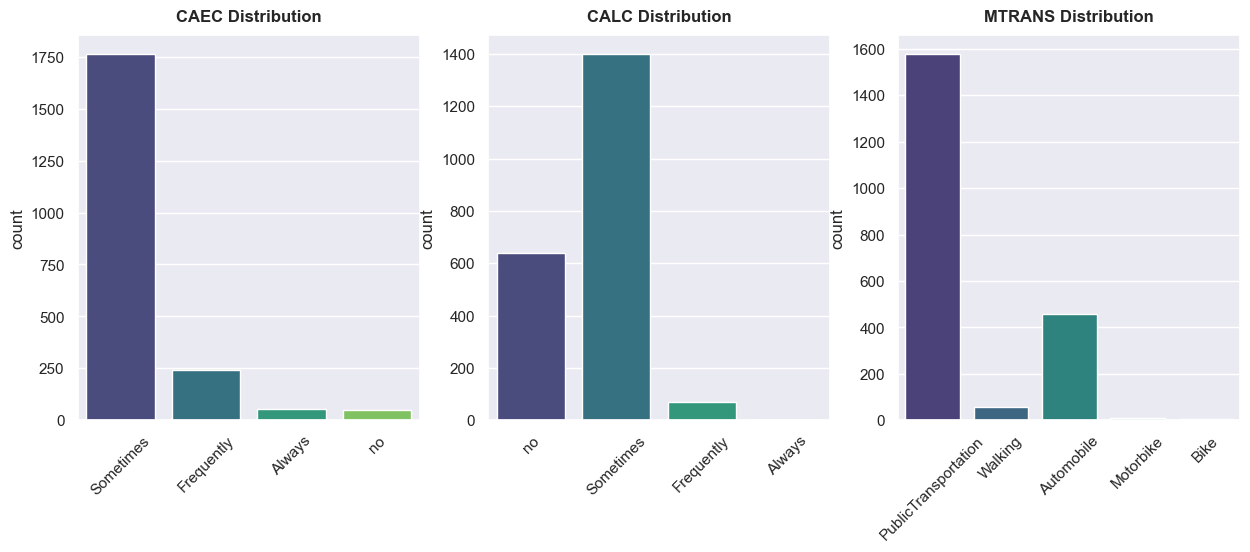

In [19]:
Obj_cols = ['CAEC','CALC','MTRANS']
plt.figure(figsize=(15,5))
for i,col in enumerate(Obj_cols):
    plt.subplot(1,3,i+1)

    sns.countplot(x=df[col],palette='viridis')
    plt.title(f'{col} Distribution', pad=10, fontweight='bold')
    plt.xlabel('')  
    plt.xticks(rotation=45)  
plt.show()

In [20]:
df_copy = df.copy()

In [21]:
from sklearn.preprocessing import PowerTransformer

In [22]:
transformer_1 = PowerTransformer()
transformer_2 = PowerTransformer()

In [23]:
df['Age'] = transformer_1.fit_transform(df[['Age']])
df['NCP'] = transformer_2.fit_transform(df[['NCP']])

In [24]:
joblib.dump(transformer_1,'Oby_Transformer_1.joblib')
joblib.dump(transformer_2,'Oby_Transformer_2.joblib')

['Oby_Transformer_2.joblib']

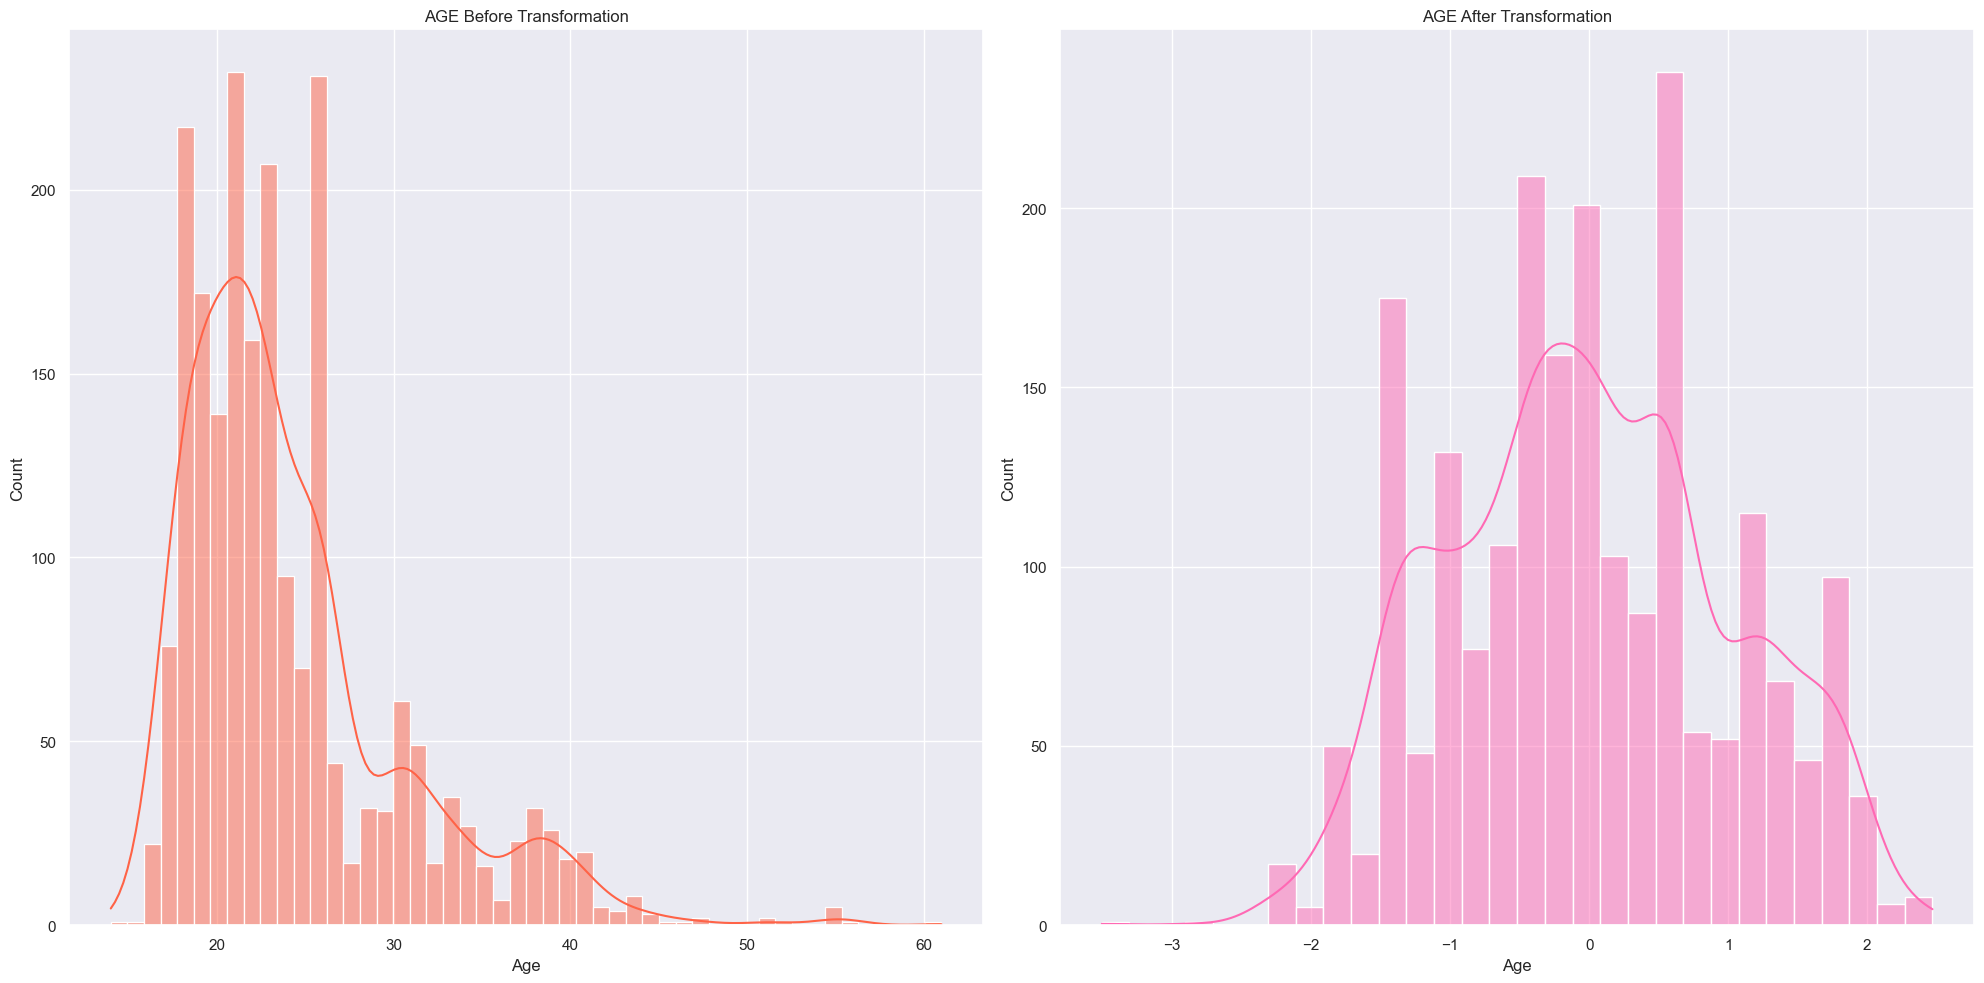

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x=df_copy['Age'],color='tomato',kde=True)
plt.title('AGE Before Transformation')

plt.subplot(1,2,2)
sns.histplot(x=df['Age'],color='hotpink',kde=True)
plt.title('AGE After Transformation')

plt.tight_layout()
plt.show()

In [26]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['Gender', 'Family', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [27]:
object_cols = ['Gender', 'Family', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
On = OrdinalEncoder()
df[object_cols] = On.fit_transform(df[object_cols])

In [30]:
joblib.dump(On,'Oby_Encoder.joblib')

['Oby_Encoder.joblib']

In [31]:
df_copy['NObeyesdad'].sort_values().unique()

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [32]:
df['NObeyesdad'].replace({'Insufficient_Weight':0,'Normal_Weight':1,'Obesity_Type_I':2,
                          'Obesity_Type_II':3,'Obesity_Type_III':4,'Overweight_Level_I':5,'Overweight_Level_II':6},inplace=True)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.iloc[:,:-1]
y = df['NObeyesdad']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
rs = RobustScaler()

In [38]:
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [39]:
joblib.dump(rs,'Oby_Scaler.joblib')

['Oby_Scaler.joblib']

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.94      0.91        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.96      0.94      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



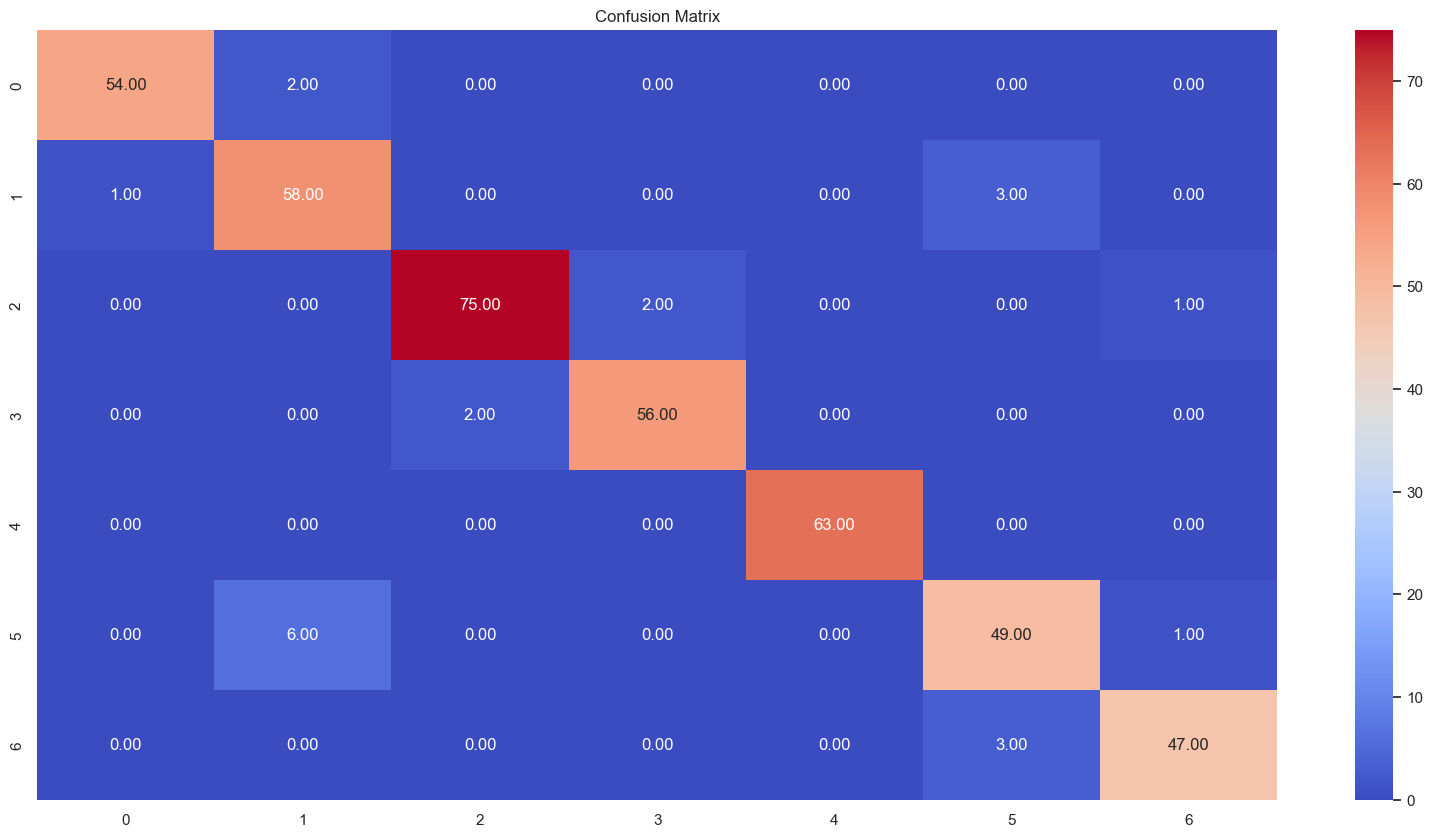

In [44]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(C=1.5)
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [47]:
report = classification_report(y_test,y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        56
           1       0.80      0.82      0.81        62
           2       0.95      0.94      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.82      0.73      0.77        56
           6       0.83      0.88      0.85        50

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.90      0.90      0.90       423



In [48]:
joblib.dump(svm,'Oby_Model.joblib')

['Oby_Model.joblib']

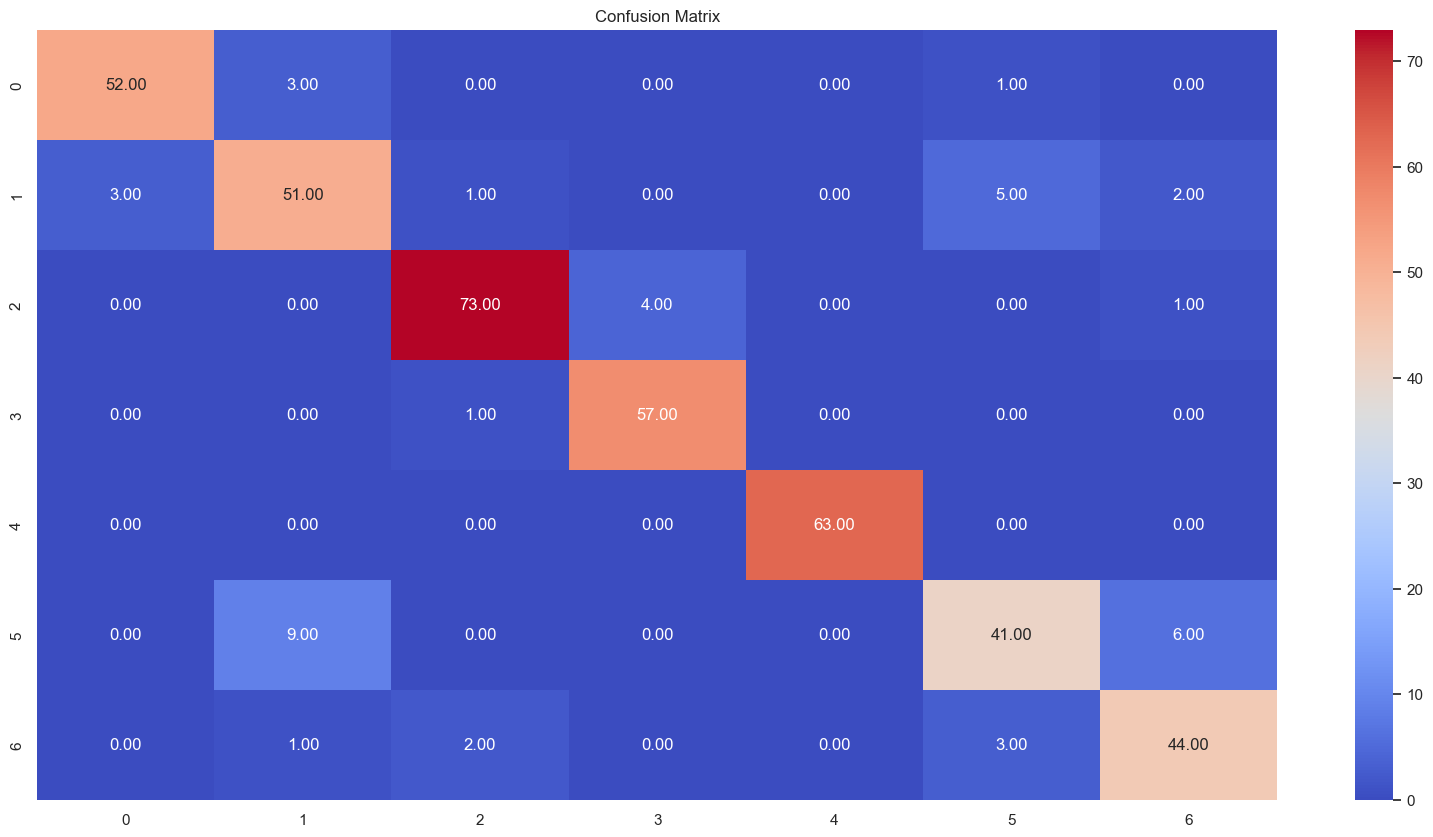

In [49]:
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [50]:
df

Gender       Age    Height      Weight  Family  FAVC  FCVC       NCP  \
0        0.0 -0.414452  1.620000   64.000000     1.0   0.0   2.0  0.299000   
1        0.0 -0.414452  1.520000   56.000000     1.0   0.0   3.0  0.299000   
2        1.0  0.055560  1.800000   77.000000     1.0   0.0   2.0  0.299000   
3        1.0  0.739738  1.800000   87.000000     0.0   0.0   3.0  0.299000   
4        1.0 -0.165942  1.780000   89.800000     0.0   0.0   2.0 -1.826251   
...      ...       ...       ...         ...     ...   ...   ...       ...   
2106     0.0 -0.420563  1.710730  131.408528     1.0   1.0   3.0  0.299000   
2107     0.0 -0.169943  1.748584  133.742943     1.0   1.0   3.0  0.299000   
2108     0.0 -0.046763  1.752206  133.689352     1.0   1.0   3.0  0.299000   
2109     0.0  0.320681  1.739450  133.346641     1.0   1.0   3.0  0.299000   
2110     0.0  0.189791  1.738836  133.472641     1.0   1.0   3.0  0.299000   

      CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0      2.0    0.0  2.000000  0.0  0.000000  1.000000   3.0     3.0           1  
1      2.0    1.0  3.000000  1.0  3.000000  0.000000   2.0     3.0           1  
2      2.0    0.0  2.000000  0.0  2.000000  1.000000   1.0     3.0           1  
3      2.0    0.0  2.000000  0.0  2.000000  0.000000   1.0     4.0           5  
4      2.0    0.0  2.000000  0.0  0.000000  0.000000   2.0     3.0           6  
...    ...    ...       ...  ...       ...       ...   ...     ...         ...  
2106   2.0    0.0  1.728139  0.0  1.676269  0.906247   2.0     3.0           4  
2107   2.0    0.0  2.005130  0.0  1.341390  0.599270   2.0     3.0           4  
2108   2.0    0.0  2.054193  0.0  1.414209  0.646288   2.0     3.0           4  
2109   2.0    0.0  2.852339  0.0  1.139107  0.586035   2.0     3.0           4  
2110   2.0    0.0  2.863513  0.0  1.026452  0.714137   2.0     3.0           4  

[2111 rows x 17 columns]

In [51]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# power_cols = ['Age', 'NCP']
# ordinal_cols = ['Gender', 'Family', 'FAVC', 'CAEC', 'SMOKE',
#        'SCC', 'CALC', 'MTRANS']
# scale_cols = X.columns

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('power', PowerTransformer(), [1,7]),
#         ('ordinal', OrdinalEncoder(), [0,4,5,8,9,11,14,15]),
#         ('scale', RobustScaler(),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
#     ],
#     remainder='passthrough'  
# )


# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', SVC())
# ])


# model_pipeline.fit(X_train, y_train)

# joblib.dump(model_pipeline, 'classification_pipeline_3.joblib')

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred3 = KNN.predict(X_test)

In [54]:
report = classification_report(y_test,y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        56
           1       0.74      0.42      0.54        62
           2       0.80      0.91      0.85        78
           3       0.89      0.97      0.93        58
           4       0.97      1.00      0.98        63
           5       0.76      0.66      0.70        56
           6       0.77      0.74      0.76        50

    accuracy                           0.81       423
   macro avg       0.81      0.81      0.80       423
weighted avg       0.81      0.81      0.80       423



In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred4 = LR.predict(X_test)

In [57]:
report = classification_report(y_test,y_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        56
           1       0.87      0.53      0.66        62
           2       0.91      0.87      0.89        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.67      0.70      0.68        56
           6       0.69      0.80      0.74        50

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.83       423
weighted avg       0.84      0.84      0.83       423



In [58]:
df_copy.head()

Gender   Age  Height  Weight Family FAVC  FCVC  NCP       CAEC SMOKE  CH2O  \
0  Female  21.0    1.62    64.0    yes   no   2.0  3.0  Sometimes    no   2.0   
1  Female  21.0    1.52    56.0    yes   no   3.0  3.0  Sometimes   yes   3.0   
2    Male  23.0    1.80    77.0    yes   no   2.0  3.0  Sometimes    no   2.0   
3    Male  27.0    1.80    87.0     no   no   3.0  3.0  Sometimes    no   2.0   
4    Male  22.0    1.78    89.8     no   no   2.0  1.0  Sometimes    no   2.0   

   SCC  FAF  TUE        CALC                MTRANS           NObeyesdad  
0   no  0.0  1.0          no  PublicTransportation        Normal_Weight  
1  yes  3.0  0.0   Sometimes  PublicTransportation        Normal_Weight  
2   no  2.0  1.0  Frequently  PublicTransportation        Normal_Weight  
3   no  2.0  0.0  Frequently               Walking   Overweight_Level_I  
4   no  0.0  0.0   Sometimes  PublicTransportation  Overweight_Level_II

In [59]:
numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

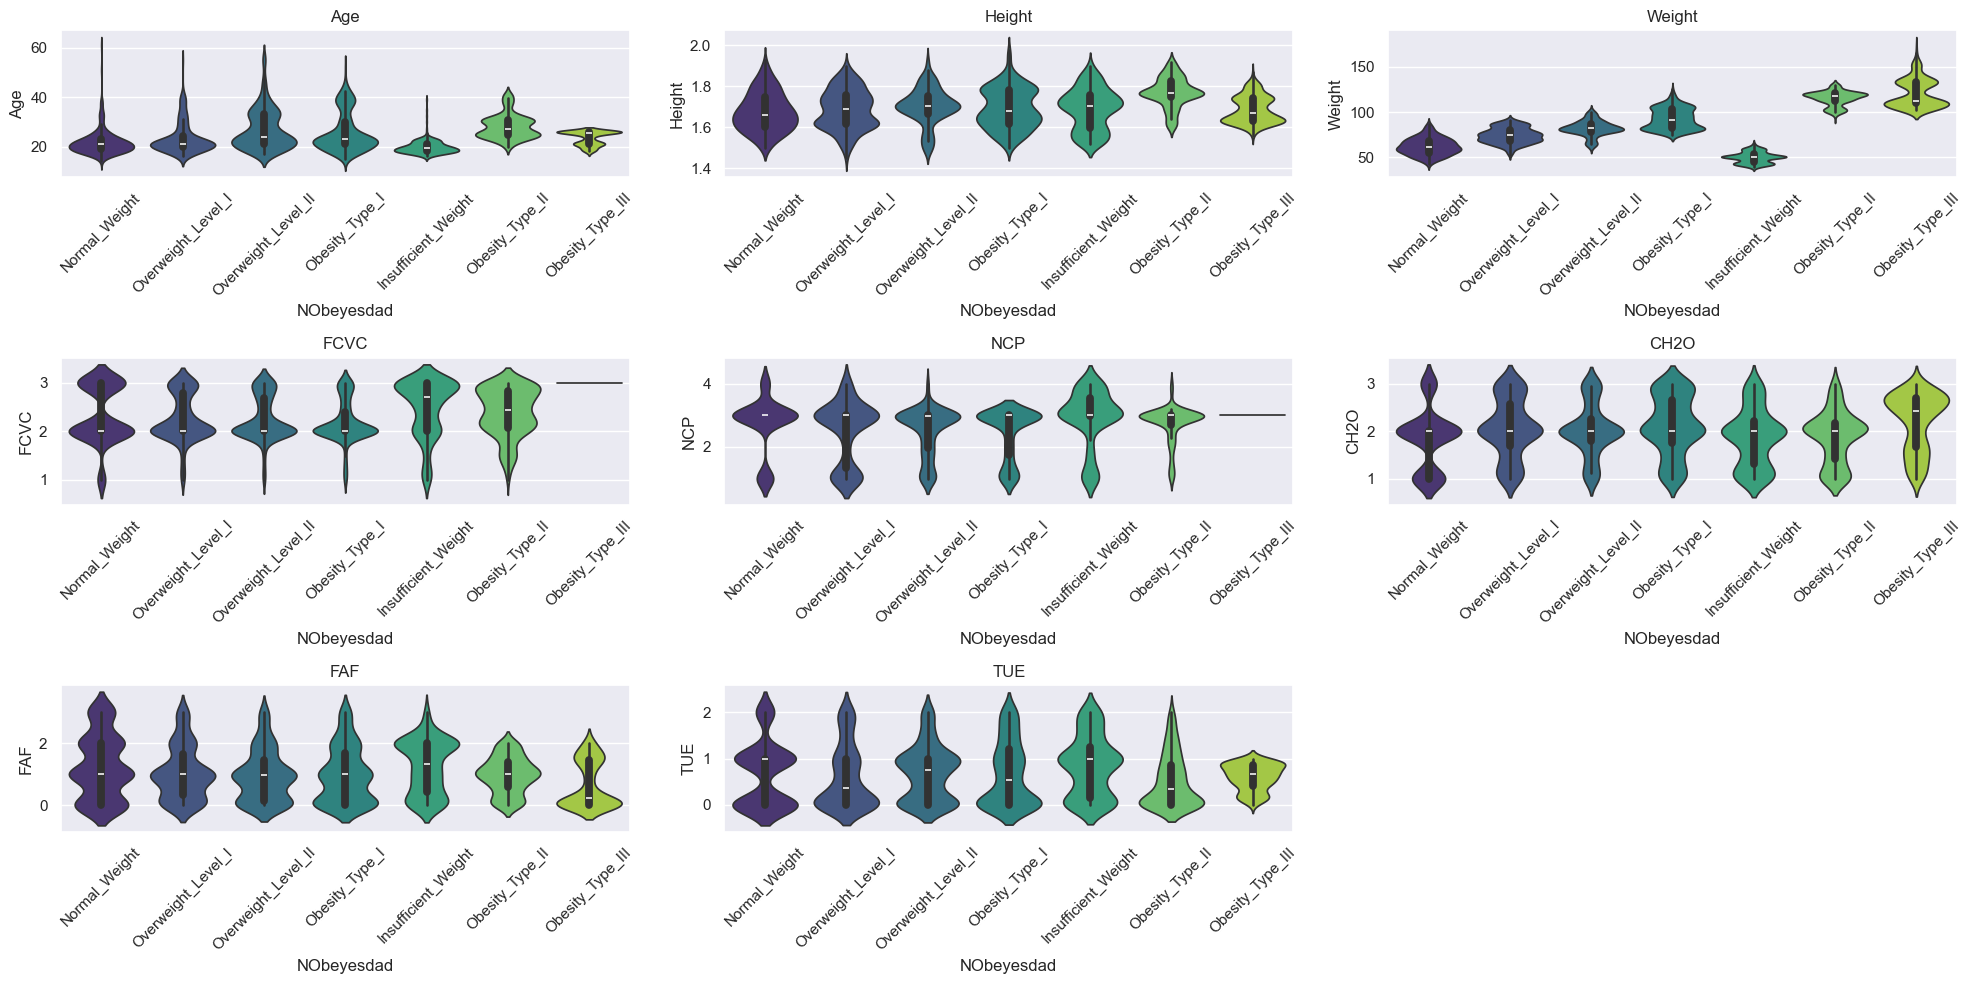

In [60]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=df_copy['NObeyesdad'],y=df_copy[col],palette='viridis')
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

In [61]:
df.head()

Gender       Age  Height  Weight  Family  FAVC  FCVC       NCP  CAEC  \
0     0.0 -0.414452    1.62    64.0     1.0   0.0   2.0  0.299000   2.0   
1     0.0 -0.414452    1.52    56.0     1.0   0.0   3.0  0.299000   2.0   
2     1.0  0.055560    1.80    77.0     1.0   0.0   2.0  0.299000   2.0   
3     1.0  0.739738    1.80    87.0     0.0   0.0   3.0  0.299000   2.0   
4     1.0 -0.165942    1.78    89.8     0.0   0.0   2.0 -1.826251   2.0   

   SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0    0.0   2.0  0.0  0.0  1.0   3.0     3.0           1  
1    1.0   3.0  1.0  3.0  0.0   2.0     3.0           1  
2    0.0   2.0  0.0  2.0  1.0   1.0     3.0           1  
3    0.0   2.0  0.0  2.0  0.0   1.0     4.0           5  
4    0.0   2.0  0.0  0.0  0.0   2.0     3.0           6

In [62]:
X = df.iloc[:,:-1]

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

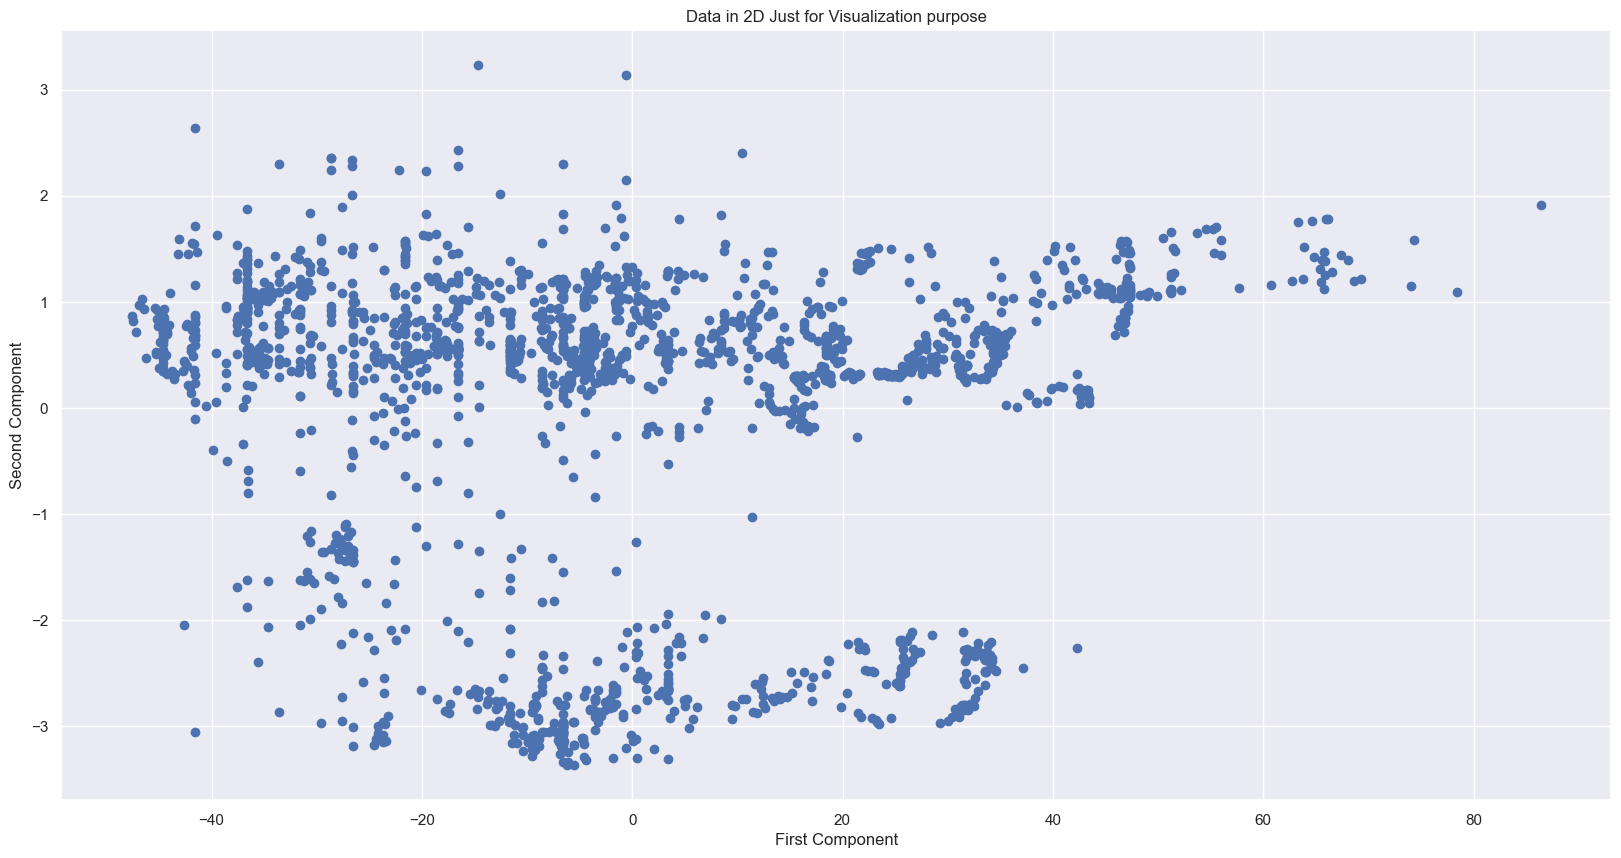

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(x=X_2d[:,0],y=X_2d[:,1])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Data in 2D Just for Visualization purpose')
plt.show()


In [66]:
pca = PCA(.95)
X_reduced = pca.fit_transform(X)

In [67]:
X_reduced.shape

(2111, 1)

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
WCSS = []
sil_csore = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    clus = kmeans.fit_predict(X_reduced)
    WCSS.append(kmeans.inertia_)
    score = silhouette_score(X_reduced,clus)
    sil_csore.append(score)

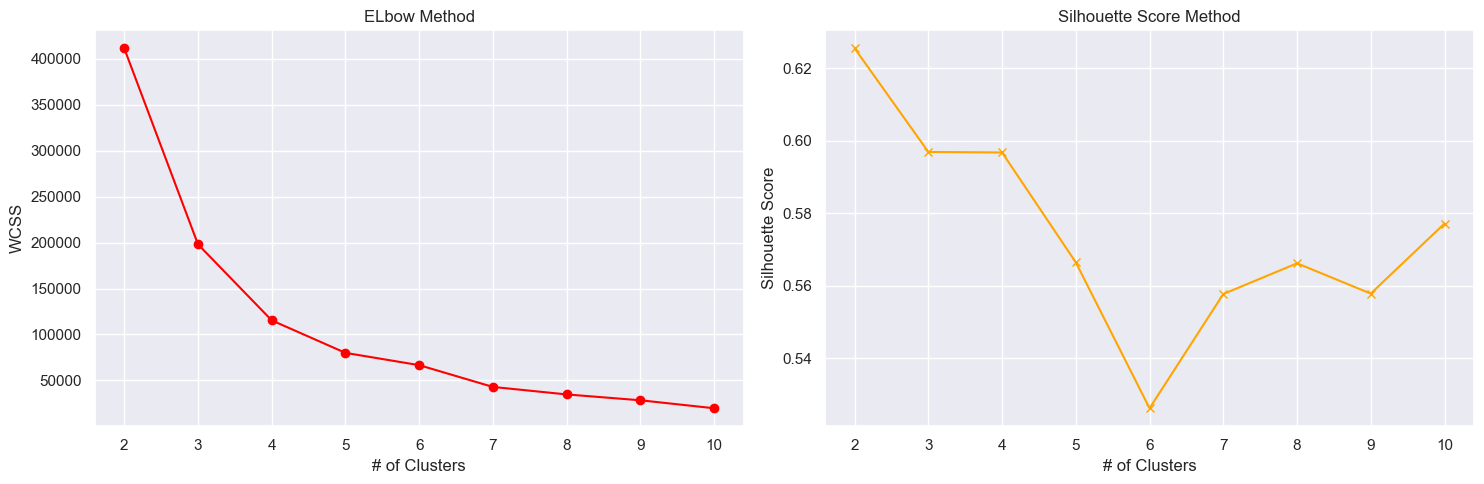

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(2,11),WCSS,marker='o',c='red')
plt.ylabel('WCSS')
plt.xlabel('# of Clusters')
plt.title('ELbow Method')

plt.subplot(1,2,2)
plt.plot(range(2,11),sil_csore,marker='x',c='orange')
plt.ylabel('Silhouette Score')
plt.xlabel('# of Clusters')
plt.title('Silhouette Score Method')


plt.tight_layout()
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(X_reduced)

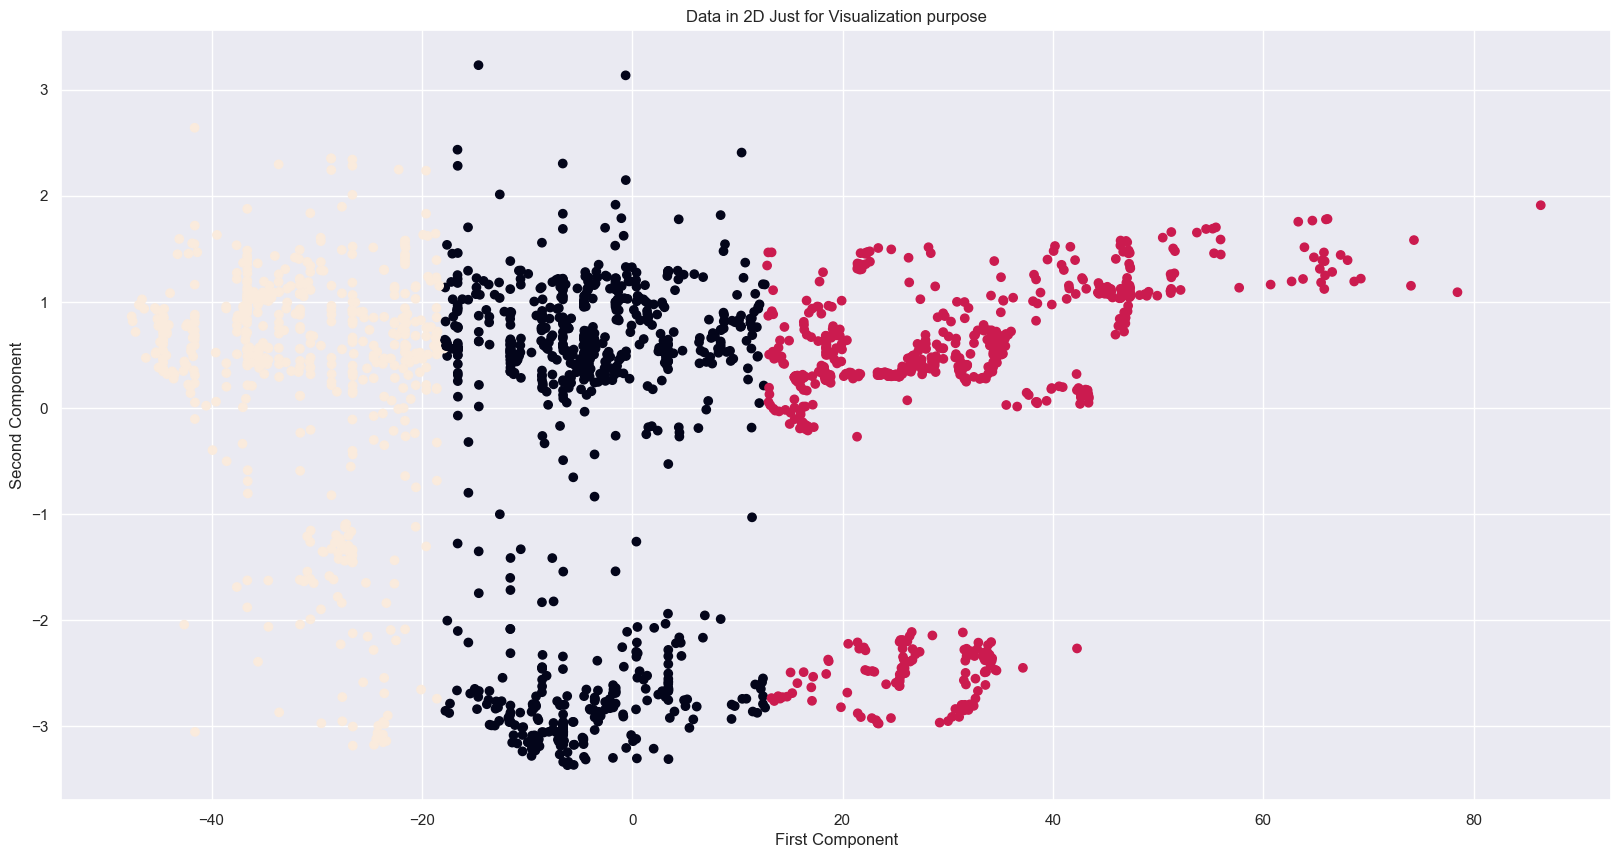

In [72]:
plt.figure(figsize=(20,10))
plt.scatter(x=X_2d[:,0],y=X_2d[:,1],c=clusters)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Data in 2D Just for Visualization purpose')
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = model.fit_predict(X_reduced)

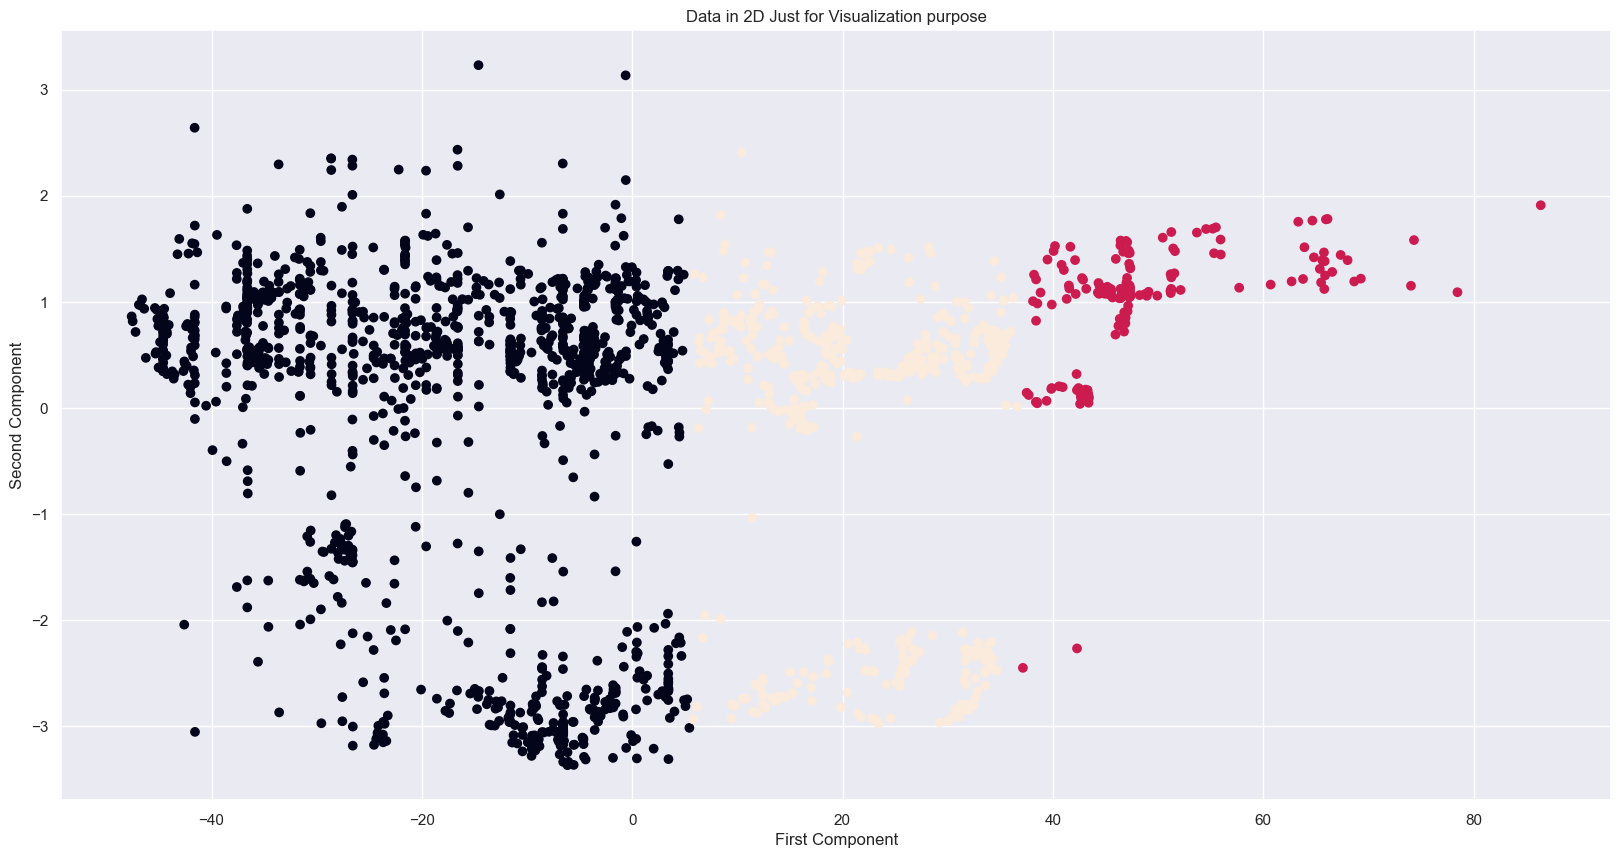

In [74]:
plt.figure(figsize=(20,10))
plt.scatter(x=X_2d[:,0],y=X_2d[:,1],c=labels)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Data in 2D Just for Visualization purpose')
plt.show()

In [75]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5409333543725596


In [76]:
df['Clusters'] = clusters
df_copy['Clusters'] = clusters

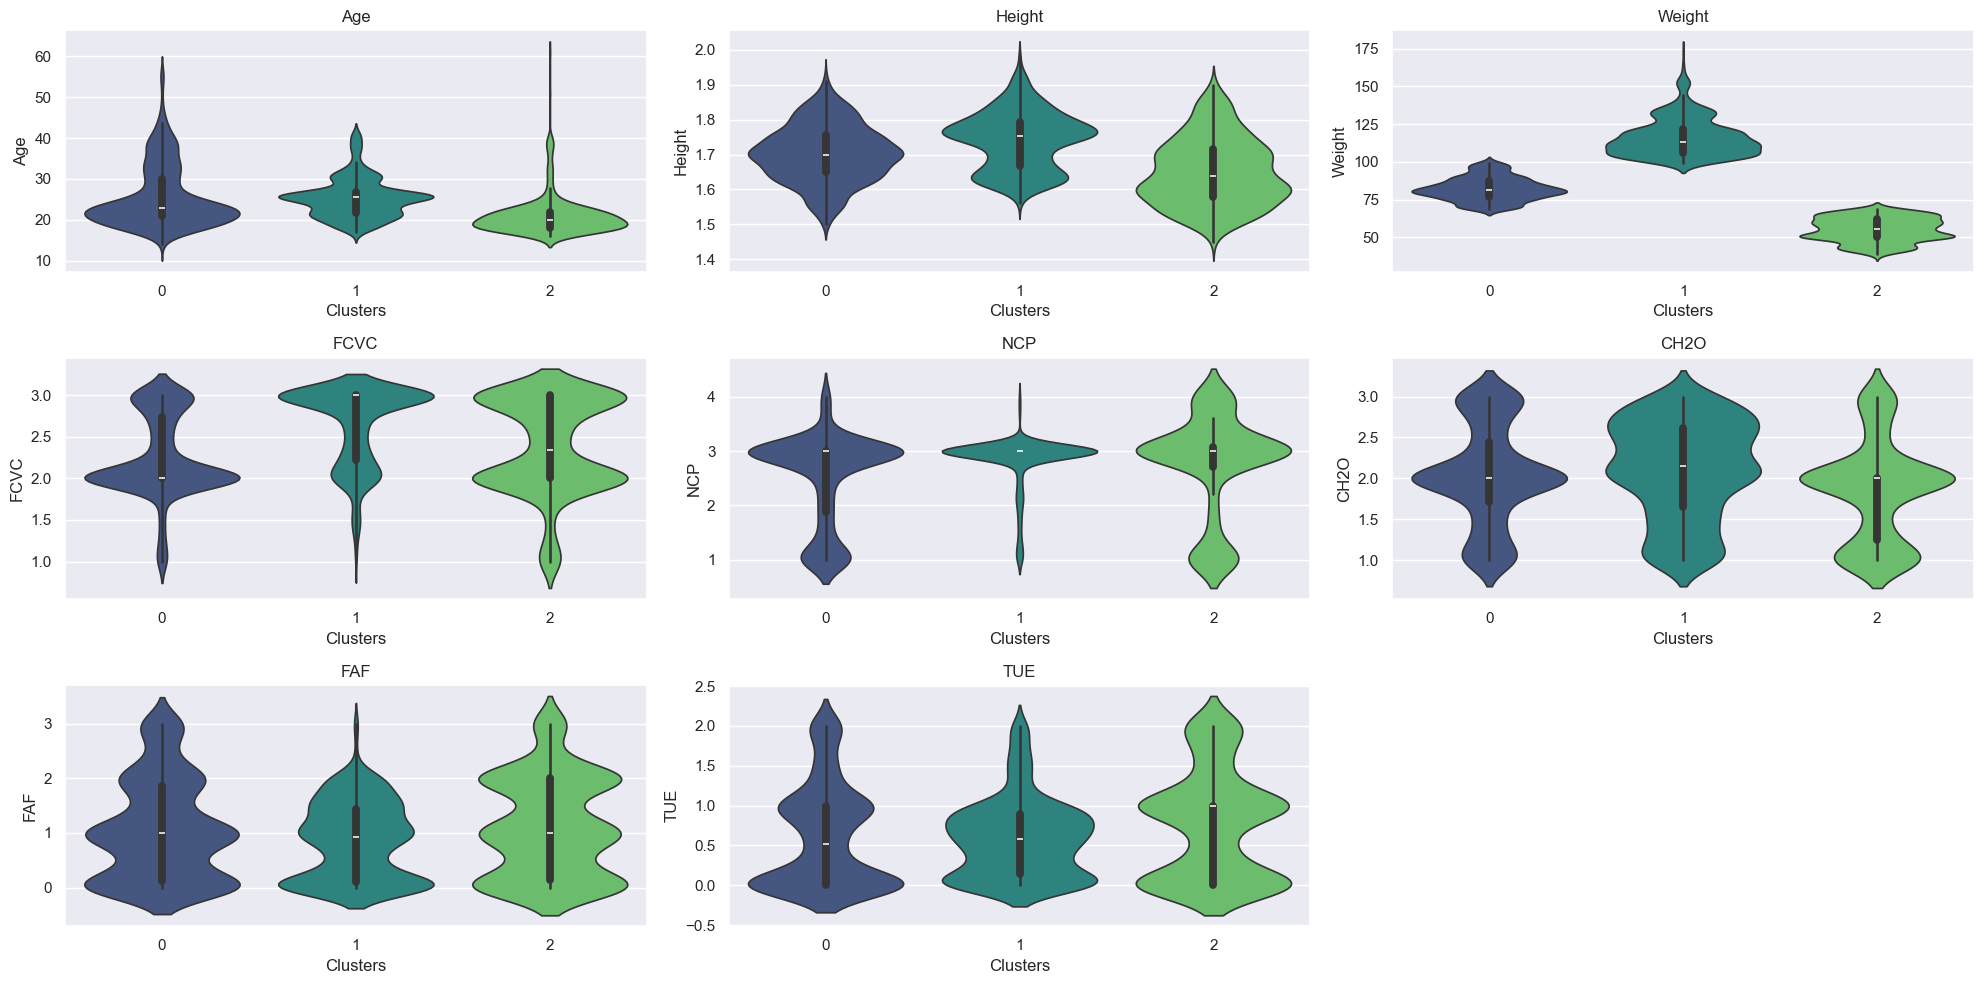

In [77]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=df_copy['Clusters'],y=df_copy[col],palette='viridis')
    plt.title(col)

plt.tight_layout()
plt.show()

In [78]:
object_cols

['Gender', 'Family', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

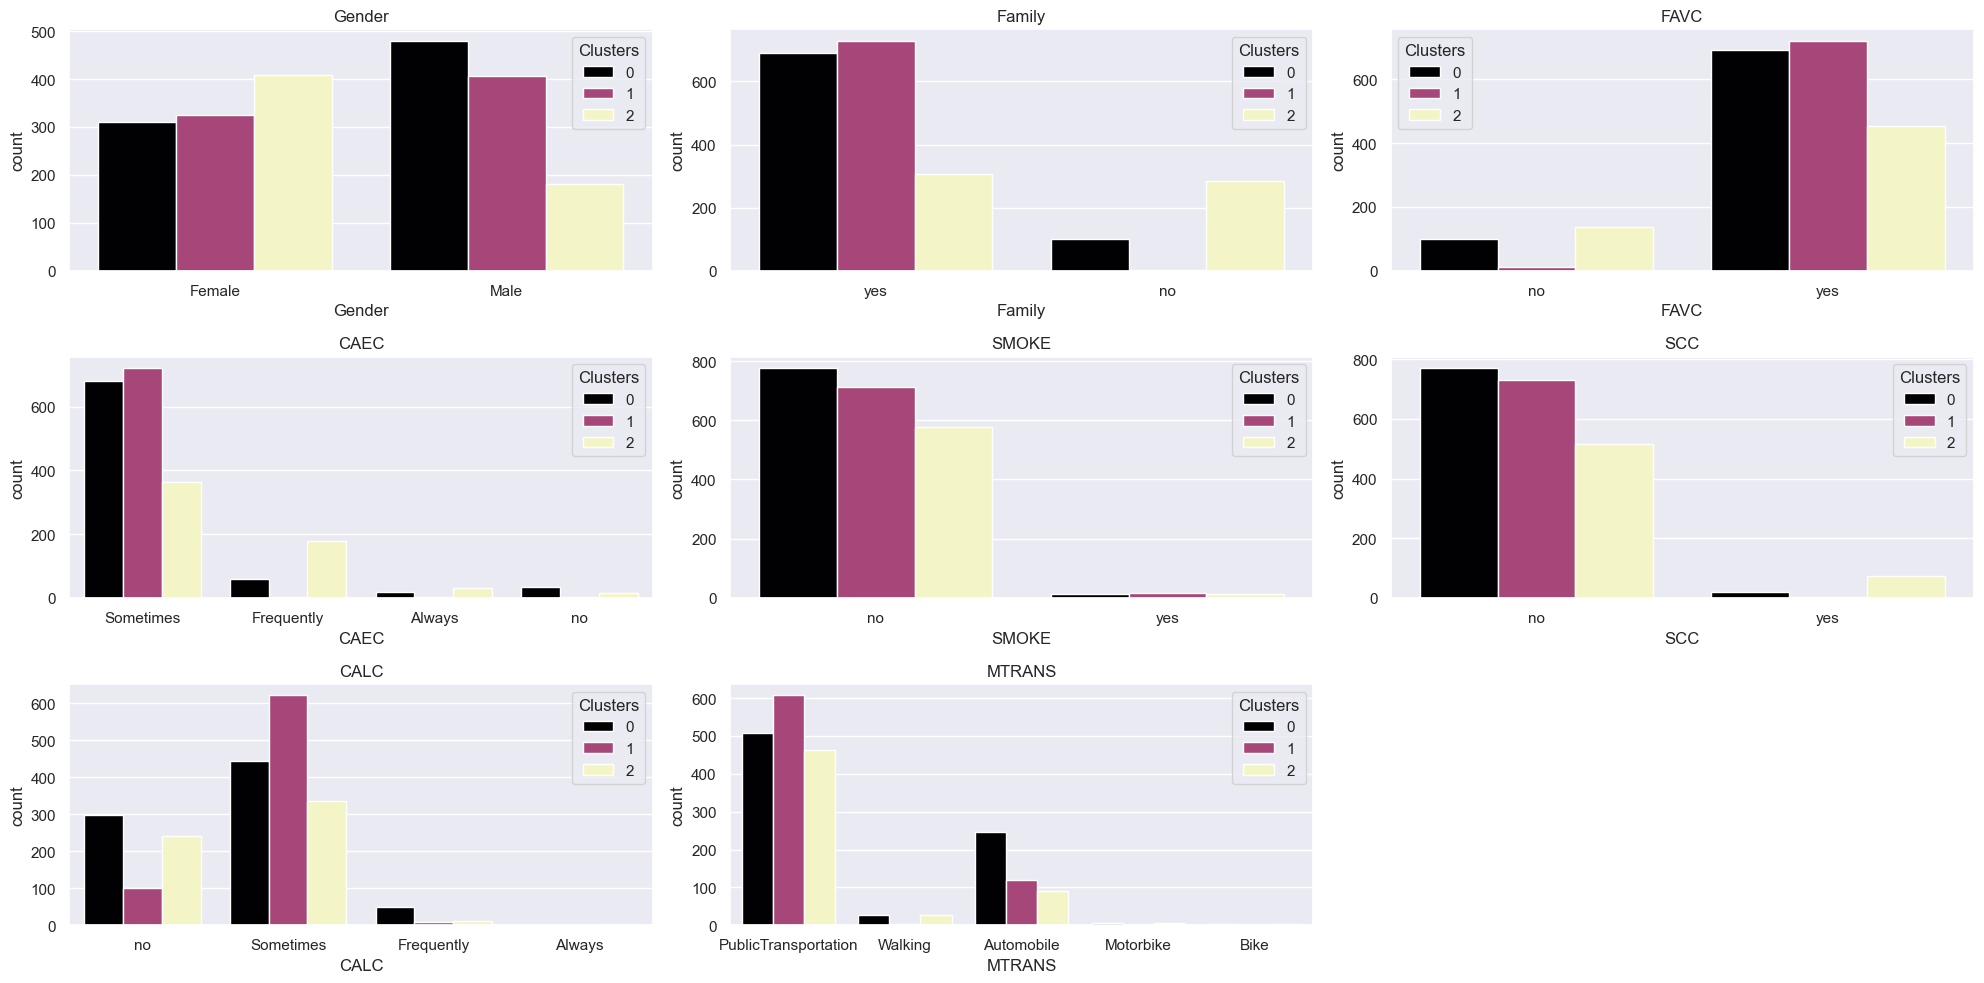

In [79]:
plt.figure(figsize=(20,10))
for i ,col in enumerate(object_cols):
    plt.subplot(3,3,1+i)
    sns.countplot(x=df_copy[col],hue=df['Clusters'],palette='magma')
    plt.title(col)

plt.tight_layout()
plt.show()

### 📝 Cluster Label

We generalized the original 6 obesity levels into **3 meaningful clusters** based on their anthropometric, dietary, and behavioral profiles. Below is the rationale for each label:

#### **Cluster 0: “Healthy-Normal Weight Group”**
- **Demographics & Measurements:** Individuals show normal weight and height distributions, with age mostly in early adulthood.  
- **Behavior & Lifestyle:** Moderate food consumption frequency (FCVC), average water intake (CH2O), and a balanced level of physical activity (FAF).  
- **Categorical Factors:** Majority do not smoke or consume alcohol frequently but have a higher family history of overweight, suggesting a potential genetic predisposition despite current healthy habits.  
✅ **Conclusion:** This cluster represents **normal-weight individuals with balanced dietary and lifestyle behaviors**.

---

#### **Cluster 1: “Overweight/Obese Lifestyle Group”**
- **Demographics & Measurements:** Individuals here have higher weight, falling in the overweight or obese BMI range, and are slightly taller on average.  
- **Behavior & Lifestyle:** High food consumption frequency (FCVC) with low physical activity (FAF) and a tendency to consume fast food (FAVC) and calories outside the home (CAEC).  
- **Categorical Factors:** Despite low smoking rates, sedentary habits and high caloric intake dominate.  
✅ **Conclusion:** This cluster represents **overweight or obese individuals with risk-enhancing lifestyle patterns**, making it important for targeted intervention.

---

#### **Cluster 2: “Underweight/Low Intake Group”**
- **Demographics & Measurements:** Generally younger individuals with lower height and weight (underweight to normal range).  
- **Behavior & Lifestyle:** Low food consumption frequency (FCVC), minimal exercise (FAF), and lower water intake (CH2O).  
- **Categorical Factors:** Less family history of overweight; transportation is mostly public or walking, indicating moderate daily activity.  
✅ **Conclusion:** This cluster groups **underweight or low-intake individuals**, potentially at risk for undernutrition or inadequate caloric intake.

---

### **Final Label Mapping**
| **Cluster** | **Assigned Label**               |
|-------------|-----------------------------------|
| 0           | Healthy-Normal Weight            |
| 1           | Overweight/Obese                 |
| 2           | Underweight/Low            |

These labels provide a **generalized, interpretable categorization** suitable for further supervised learning tasks, health recommendations, or targeted analysis pipelines.


In [80]:
df_copy['Clusters'].replace({0:'Healthy-Normal Weight',1:'Overweight/Obese',2:'Underweight/Low'},inplace=True)

In [81]:
df_copy.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad', 'Clusters'],
      dtype='object')

In [82]:
vis1 = df_copy.groupby(['Clusters','NObeyesdad']).size().unstack(fill_value=0)
vis1

NObeyesdad             Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Clusters                                                                    
Healthy-Normal Weight                    0             72             241   
Overweight/Obese                         0              0             110   
Underweight/Low                        272            215               0   

NObeyesdad             Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Clusters                                                                       
Healthy-Normal Weight                5                 0                 213   
Overweight/Obese                   292               324                   0   
Underweight/Low                      0                 0                  77   

NObeyesdad             Overweight_Level_II  
Clusters                                    
Healthy-Normal Weight                  259  
Overweight/Obese                         5  
Underweight/Low                         26

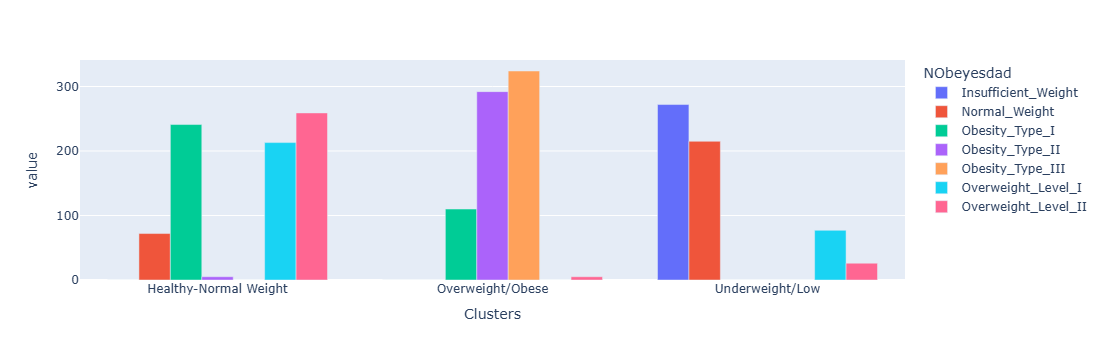

In [83]:
px.bar(data_frame=vis1,barmode='group')

In [84]:
df_copy.to_csv('Dashboard_Data_obesity.csv',index=False)